In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [12]:
file_name = 'pre_processado_completo.csv'

df = pd.read_csv(file_name, header=0, error_bad_lines=False, warn_bad_lines=False)

In [13]:
df.head()

,city,state,country,shape,duration_m,comments,latitude,longitude,date
0,san marcos,tx,us,cylinder,45.000000,This event took place in early fall around 194...,29.883056,-97.941111,1949-10-10
1,edna,tx,us,circle,0.333333,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956-10-10
2,kaneohe,hi,us,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960-10-10
3,bristol,tn,us,sphere,5.000000,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961-10-10
4,norwalk,ct,us,disk,20.000000,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965-10-10


In [14]:
df_us = df.loc[df['country'] == 'us']
df_us.head()

,city,state,country,shape,duration_m,comments,latitude,longitude,date
0,san marcos,tx,us,cylinder,45.000000,This event took place in early fall around 194...,29.883056,-97.941111,1949-10-10
1,edna,tx,us,circle,0.333333,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956-10-10
2,kaneohe,hi,us,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960-10-10
3,bristol,tn,us,sphere,5.000000,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961-10-10
4,norwalk,ct,us,disk,20.000000,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965-10-10


In [15]:
lat_lon = np.array(df_us[['longitude', 'latitude']]).astype(float)

In [16]:
print(len(lat_lon))
print(lat_lon)

68055
[[ -97.9411111   29.8830556]
 [ -96.6458333   28.9783333]
 [-157.8036111   21.4180556]
 ...
 [ -97.4777778   35.6527778]
 [ -82.6958333   34.3769444]
 [ -80.1436111   26.1219444]]


In [8]:
states = list(df_us['state'])

In [9]:
pesos = [states.count(s) for s in states]

In [37]:
scaler = MinMaxScaler()

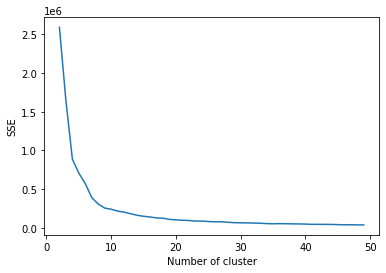

In [39]:
sse = {}
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(scaler.fit_transform(lat_lon), sample_weight=pesos)
    #X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Soma das distâncias das instâncias para os seus clusters (agrupamentos) mais próximos.
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### De acordo com o Elbow Criteria o número adequado de clusters é em torno de 20

In [ ]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(scaler.fit_transform(lat_lon))
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(scaler.fit_transform(lat_lon), label, metric='euclidean')
    print("Para n_clusters={}, o coeficiente de  Silhouette {}".format(k, sil_coeff))

In [33]:
kmeans = KMeans(n_clusters=20, max_iter=2000)
kmeans.fit(scaler.fit_transform(lat_lon), sample_weight=pesos)
lat_lon_scaled = np.array(scaler.fit_transform(lat_lon))
lat_lon_scaled

array([[0.71027257, 0.22622871],
       [0.72196002, 0.20905126],
       [0.17012595, 0.06550849],
       ...,
       [0.71445329, 0.3357752 ],
       [0.84783257, 0.31155167],
       [0.87086158, 0.1548186 ]])

In [34]:
locations = kmeans.labels_.astype(float)
print(len(locations))
locations

68055


array([ 2.,  2.,  8., ..., 12., 10.,  6.])

In [35]:
centers = kmeans.cluster_centers_

Text(0, 0.5, 'Longitude')

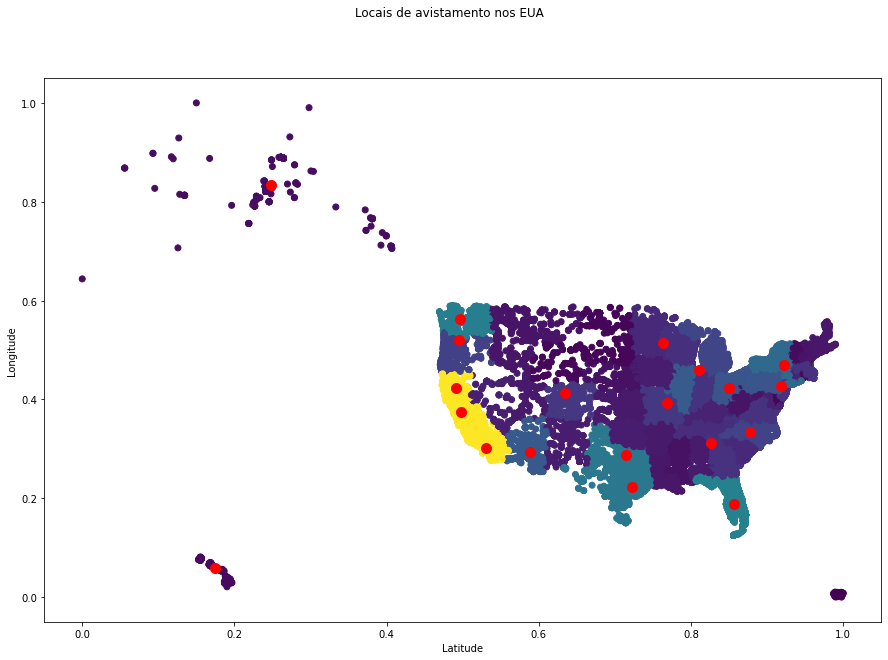

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(lat_lon_scaled[:, 0], lat_lon_scaled[:, 1], c=pesos)
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
fig.suptitle('Locais de avistamento nos EUA')
plt.xlabel('Latitude')
plt.ylabel('Longitude')